**WORLD COUNTRY GDP PREDICTION**

The goal of the project is to understand this dataset, get some insights from it, and finally to train a model that can predict GDP per capita for each country.

In [228]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [12]:
#Data Import

df = pd.read_csv('countries of the world.csv')

In [14]:
#Data Description

df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [16]:
#Data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [20]:
df.columns

Index(['country', 'region', 'population', 'area', 'density',
       'coastline_area_ratio', 'net_migration', 'infant_mortality',
       'gdp_per_capita', 'literacy', 'phones', 'arable', 'crops', 'other',
       'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service'],
      dtype='object')

In [22]:
#Fix Data

typesdf.country = df.country.astype('category')

df.region = df.region.astype('category')

df.density = df.density.astype(str)
df.density = df.density.str.replace(",",".").astype(float)

df.coastline_area_ratio = df.coastline_area_ratio.astype(str)
df.coastline_area_ratio = df.coastline_area_ratio.str.replace(",",".").astype(float)

df.net_migration = df.net_migration.astype(str)
df.net_migration = df.net_migration.str.replace(",",".").astype(float)

df.infant_mortality = df.infant_mortality.astype(str)
df.infant_mortality = df.infant_mortality.str.replace(",",".").astype(float)

df.literacy = df.literacy.astype(str)
df.literacy = df.literacy.str.replace(",",".").astype(float)

df.phones = df.phones.astype(str)
df.phones = df.phones.str.replace(",",".").astype(float)

df.arable = df.arable.astype(str)
df.arable = df.arable.str.replace(",",".").astype(float)

df.crops = df.crops.astype(str)
df.crops = df.crops.str.replace(",",".").astype(float)

df.other = df.other.astype(str)
df.other = df.other.str.replace(",",".").astype(float)

df.climate = df.climate.astype(str)
df.climate = df.climate.str.replace(",",".").astype(float)

df.birthrate = df.birthrate.astype(str)
df.birthrate = df.birthrate.str.replace(",",".").astype(float)

df.deathrate = df.deathrate.astype(str)
df.deathrate = df.deathrate.str.replace(",",".").astype(float)

df.agriculture = df.agriculture.astype(str)
df.agriculture = df.agriculture.str.replace(",",".").astype(float)

df.industry = df.industry.astype(str)
df.industry = df.industry.str.replace(",",".").astype(float)

df.service = df.service.astype(str)
df.service = df.service.str.replace(",",".").astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

In [30]:
df.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [34]:
#Check Missing Values

print(df.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.38159722222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

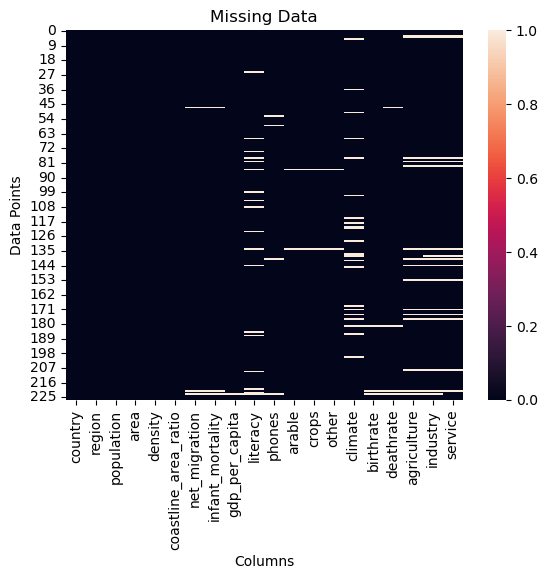

In [36]:
sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [38]:
#Check Undefined Features

df.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN


In [40]:
df.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [42]:
h1 = df.loc[:, ['country', 'region', 'climate']][df.climate == 1].head()
h2 = df.loc[:, ['country', 'region', 'climate']][df.climate == 2].head()
h3 = df.loc[:, ['country', 'region', 'climate']][df.climate == 3].head()
h4 = df.loc[:, ['country', 'region', 'climate']][df.climate == 4].head()
h5 = df.loc[:, ['country', 'region', 'climate']][df.climate == 1.5].head()
h6 = df.loc[:, ['country', 'region', 'climate']][df.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0
14,"Bahamas, The",LATIN AMER. & CARIB,2.0


Climate has 6 unique values, and they are: 1, 1.5, 2, 2.5, 3, and 4. 

**DATA CLEANING**

In [47]:
#Missing data

print(df.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


In [53]:
df['net_migration'].fillna(0, inplace=True)
df['infant_mortality'].fillna(0, inplace=True)
df['gdp_per_capita'].fillna(2500, inplace=True)
df['literacy'].fillna(df.groupby('region')['literacy'].transform('mean'), inplace= True)
df['phones'].fillna(df.groupby('region')['phones'].transform('mean'), inplace= True)
df['arable'].fillna(0, inplace=True)
df['crops'].fillna(0, inplace=True)
df['other'].fillna(0, inplace=True)
df['climate'].fillna(0, inplace=True)
df['birthrate'].fillna(df.groupby('region')['birthrate'].transform('mean'), inplace= True)
df['deathrate'].fillna(df.groupby('region')['deathrate'].transform('mean'), inplace= True)
df['agriculture'].fillna(0.17, inplace=True)
df['service'].fillna(0.8, inplace=True)
df['industry'].fillna((1 - df['agriculture'] - df['service']), inplace= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2196\576110238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['net_migration'].fillna(0, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2196\576110238.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [55]:
print(df.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


**EDA**

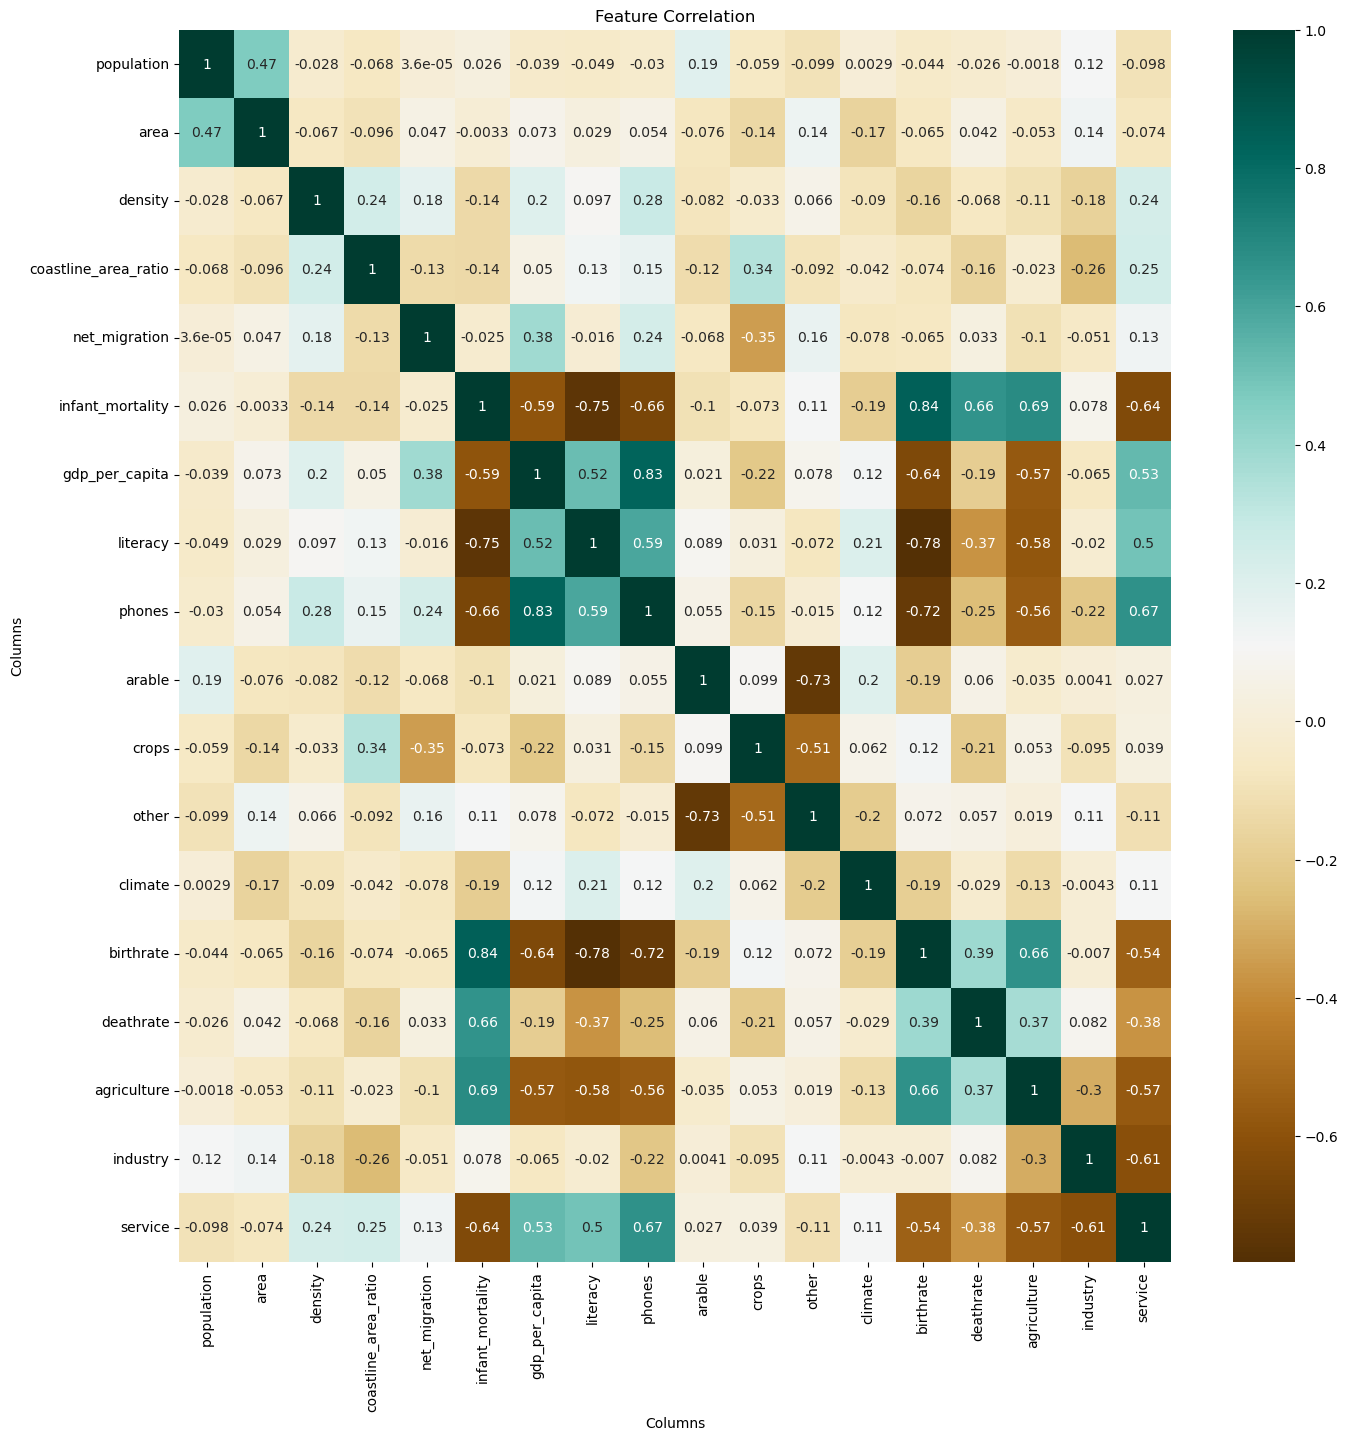

In [74]:
#Correlation heatmap

numeric_df = df.select_dtypes(include=['number'])

fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(numeric_df.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title='Feature Correlation', xlabel='Columns', ylabel='Columns')
plt.show()

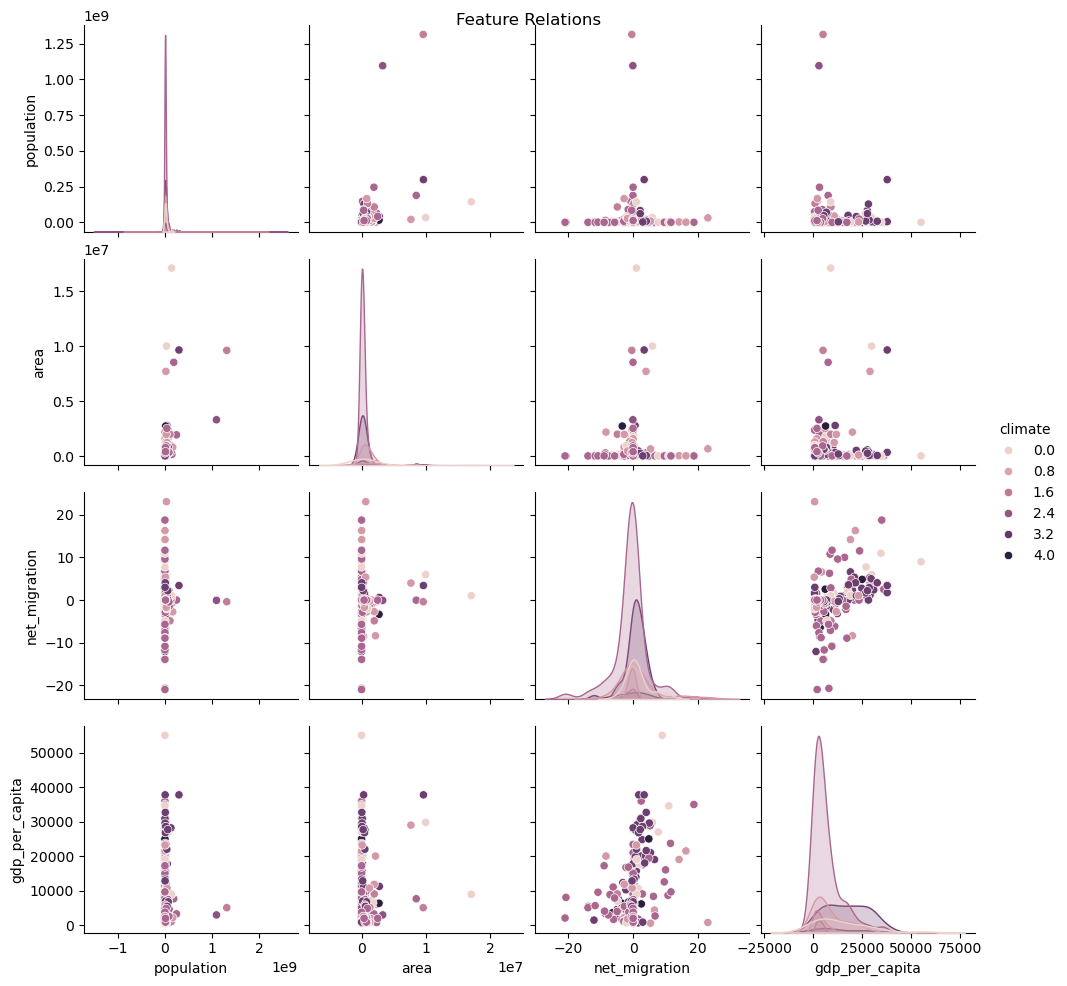

In [81]:
g = sns.pairplot(df[['population', 'area', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2196\2689750528.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, y= 'region', ax= ax1, palette='BrBG')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2196\2689750528.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= df, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='BrBG', ci= None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2196\2689750528.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='BrBG', ci= None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2196\2689750528.py:11: FutureWarning: 

The `ci` pa

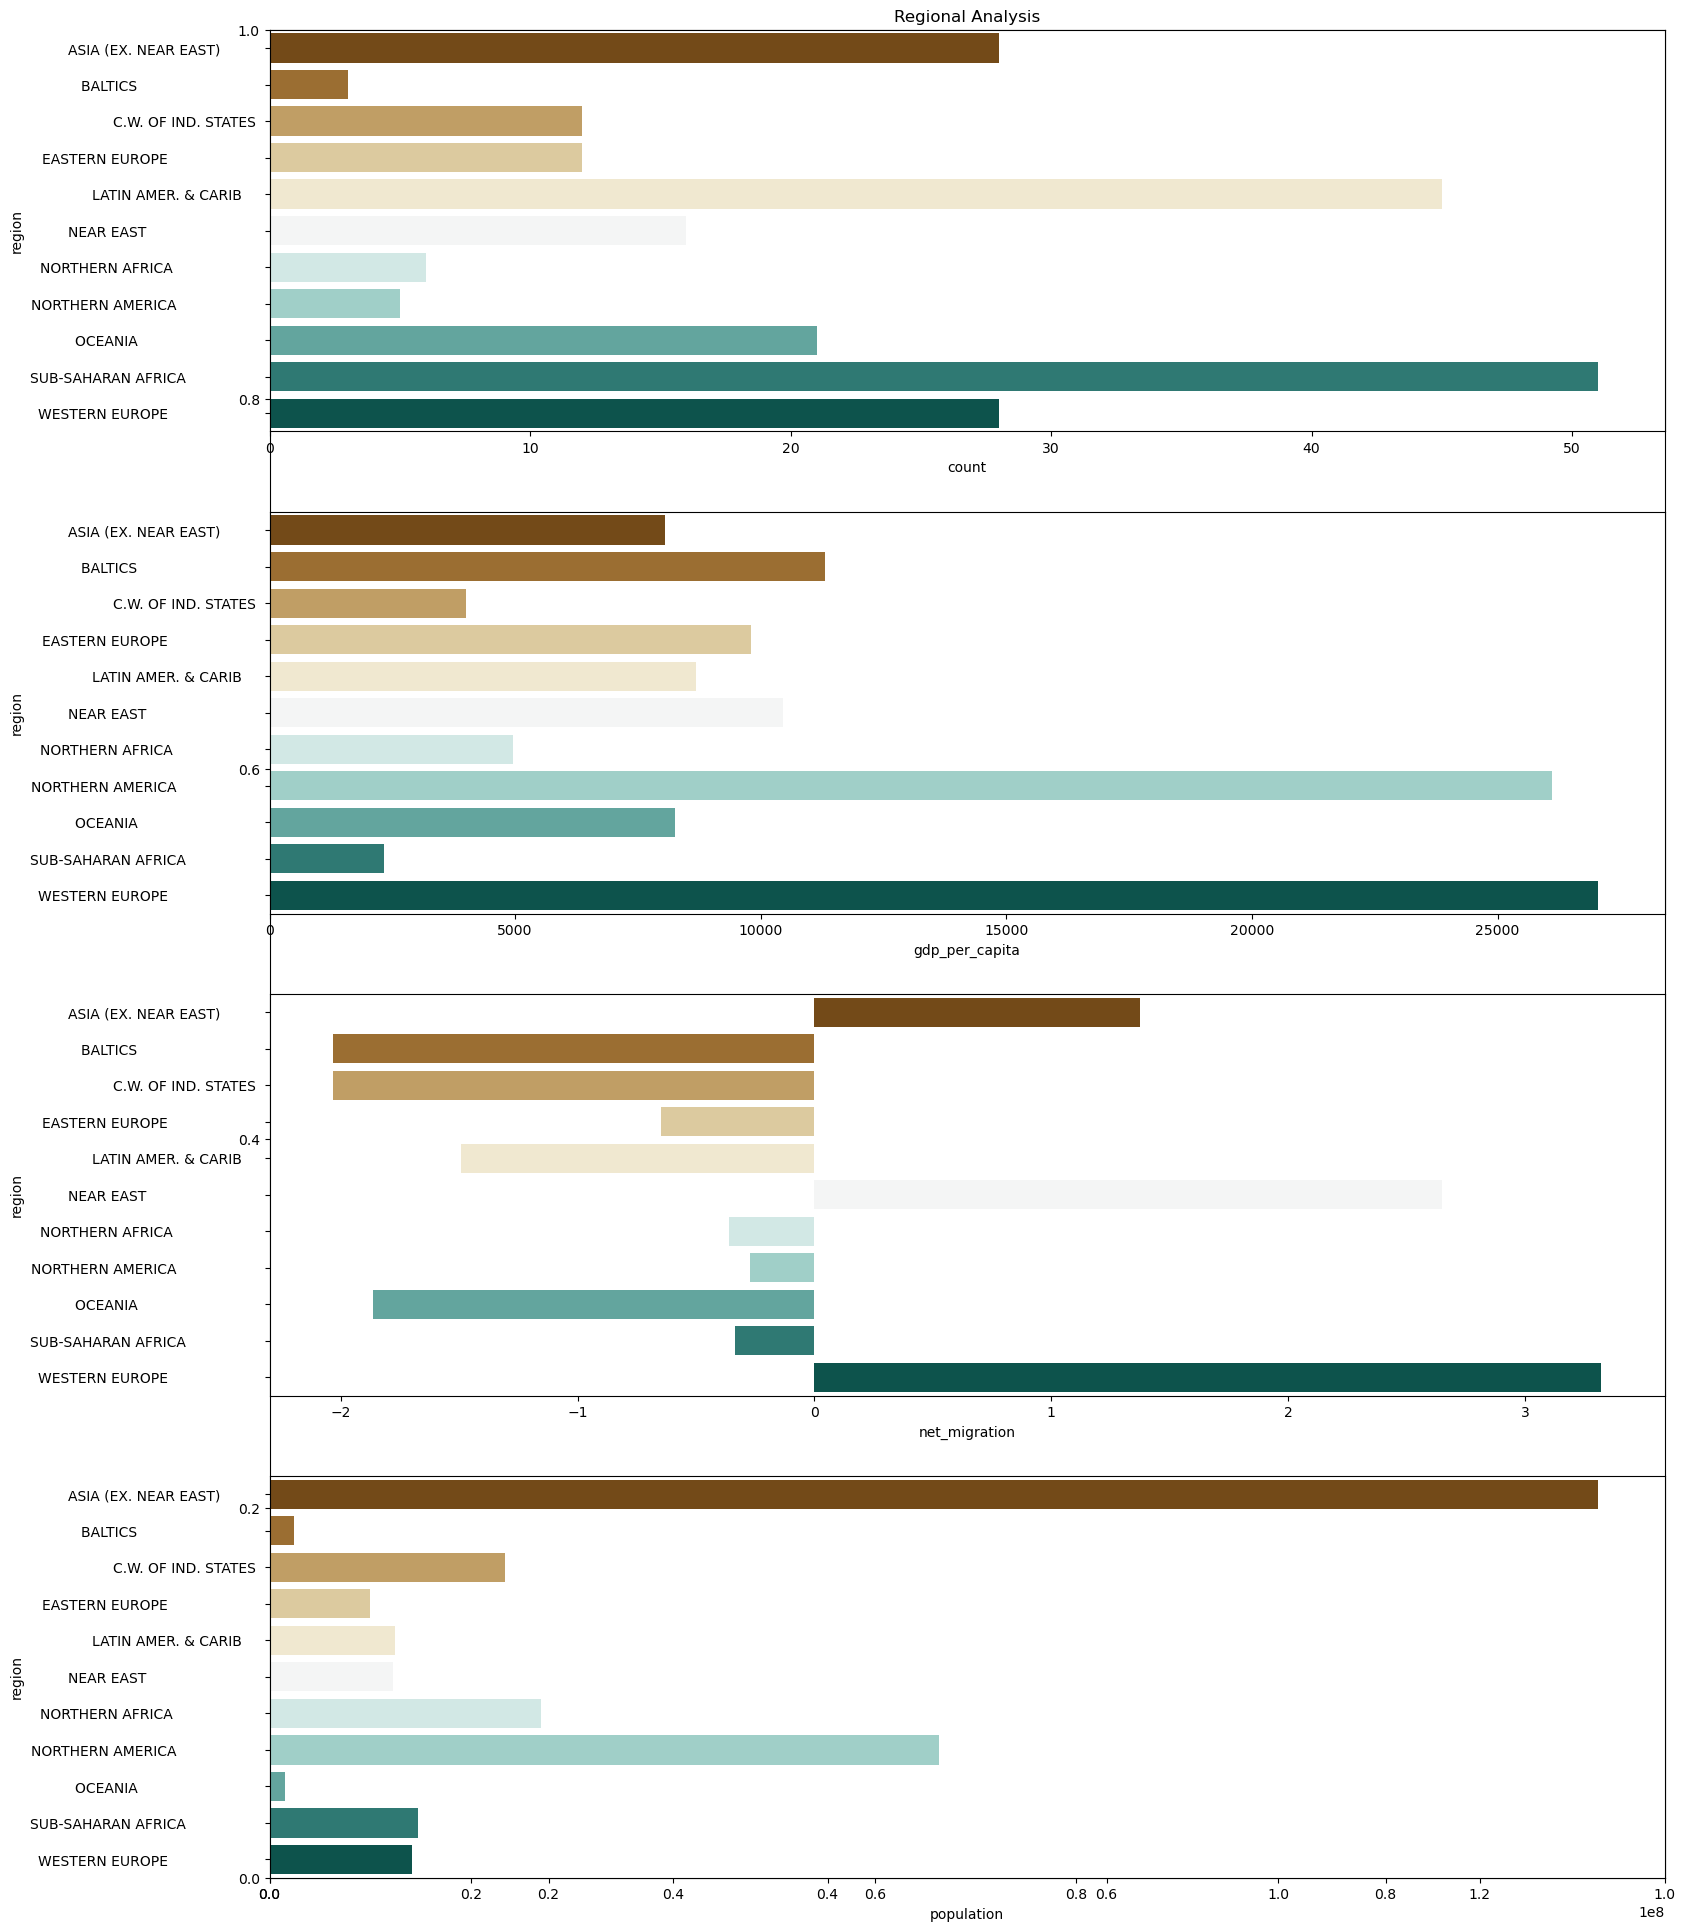

In [230]:
#Regional Analysis

fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= df, y= 'region', ax= ax1, palette='BrBG')
sns.barplot(data= df, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='BrBG', ci= None)
sns.barplot(data= df, y= 'region', x= 'net_migration', ax= ax3, palette='BrBG', ci= None)
sns.barplot(data= df, y= 'region', x= 'population', ax= ax4, palette='BrBG', ci= None)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2196\204766781.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')


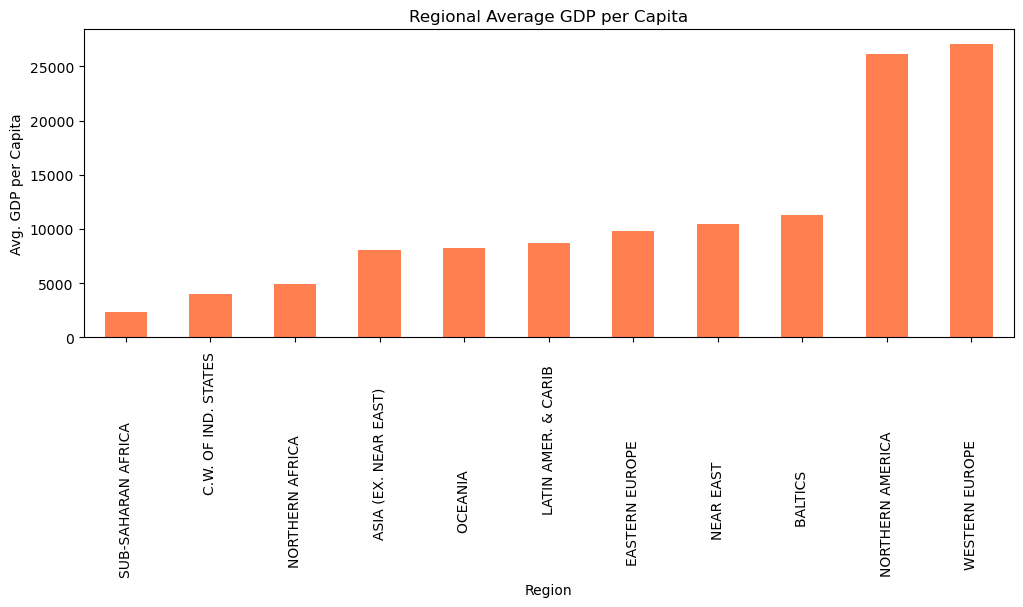

In [87]:
#GDP Analysis

fig = plt.figure(figsize=(12, 4))
df.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

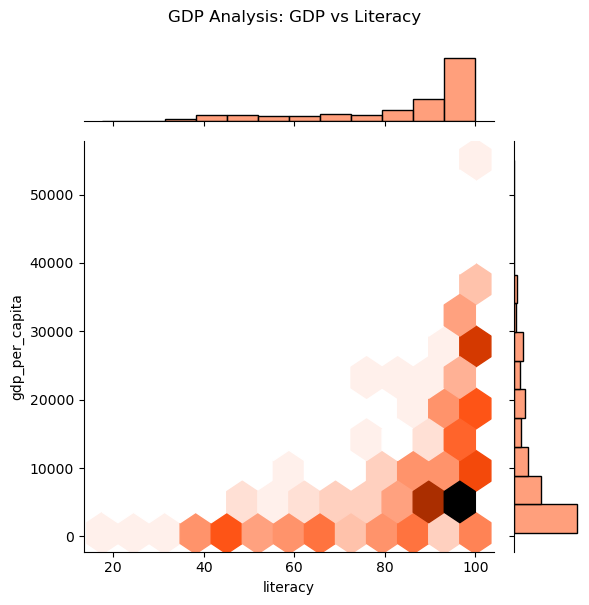

In [101]:
g = sns.jointplot(data=df, x='literacy', y='gdp_per_capita', kind='hex', color='coral')

g.fig.suptitle('GDP Analysis: GDP vs Literacy', fontsize=12, y=1)

plt.tight_layout()
plt.show()

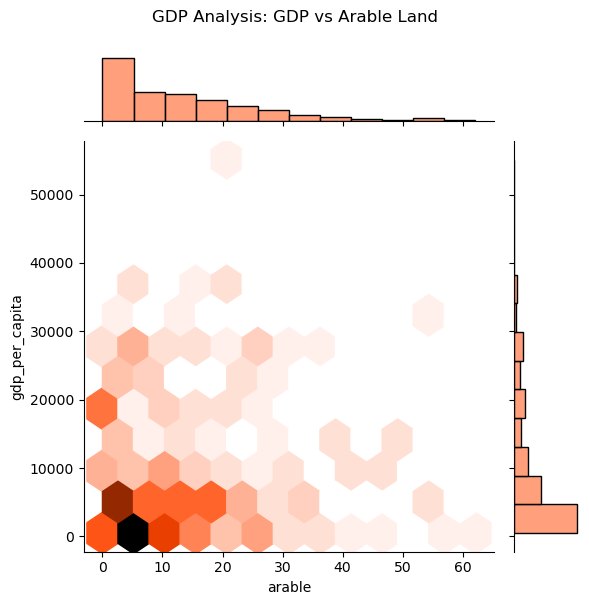

In [99]:
g = sns.jointplot(data=df, x='arable', y='gdp_per_capita', kind='hex', color='coral')

g.fig.suptitle('GDP Analysis: GDP vs Arable Land', fontsize=12, y=1)

plt.tight_layout()
plt.show()

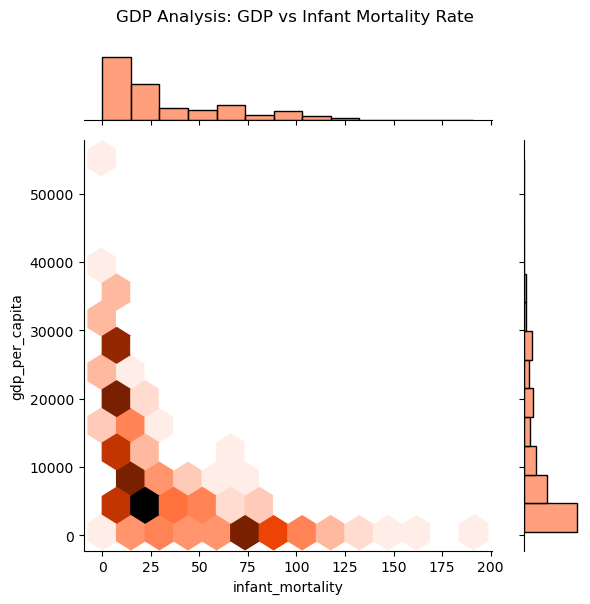

In [103]:
g = sns.jointplot(data=df, x='infant_mortality', y='gdp_per_capita', kind='hex', color='coral')

g.fig.suptitle('GDP Analysis: GDP vs Infant Mortality Rate', fontsize=12, y=1)

plt.tight_layout()
plt.show()

In [107]:
df_final = pd.concat([df,pd.get_dummies(df['region'], prefix='region')], axis=1).drop(['region'],axis=1)
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     227 non-null    category
 1   population                                  227 non-null    int64   
 2   area                                        227 non-null    int64   
 3   density                                     227 non-null    float64 
 4   coastline_area_ratio                        227 non-null    float64 
 5   net_migration                               227 non-null    float64 
 6   infant_mortality                            227 non-null    float64 
 7   gdp_per_capita                              227 non-null    float64 
 8   literacy                                    227 non-null    float64 
 9   phones                                      227 non-null    float64 
 10  ar

In [116]:
df_final.head()

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,False,False,False,False,False,False,False,False,False,False
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,False,False,True,False,False,False,False,False,False,False
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,False,False,False,False,False,True,False,False,False,False
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,False,False,False,False,False,False,False,True,False,False
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,False,False,False,False,False,False,False,False,False,True


**Data Split 1: all of our final dataset, no scaling**

In [130]:
y = df_final['gdp_per_capita']
X = df_final.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Data Split 2: all of our final dataset, with scaling**

In [132]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

**Data Split 3: feature selected dataset, no scaling**

In [134]:
y3 = y
X3 = df_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

**Data Split 3: feature selected dataset, with scaling**

In [136]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

**LINEAR REGRESSION**

In [138]:
#Model Training

lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

In [140]:
#Predictions

lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

Linear Regression Performance:

all features, No scaling:
MAE: 330350.8586602117
RMSE: 1570337.5456393557
R2_Score:  -29843.12038336378

all features, with scaling:
MAE: 569019.4687591456
RMSE: 1283170.8219659454
R2_Score:  -19925.990118484966

selected features, No scaling:
MAE: 2965.9357229398765
RMSE: 4088.7945802479503
R2_Score:  0.7976685756858997

selected features, with scaling:
MAE: 2879.5213243944386
RMSE: 3756.4365885029665
R2_Score:  0.829224770271209


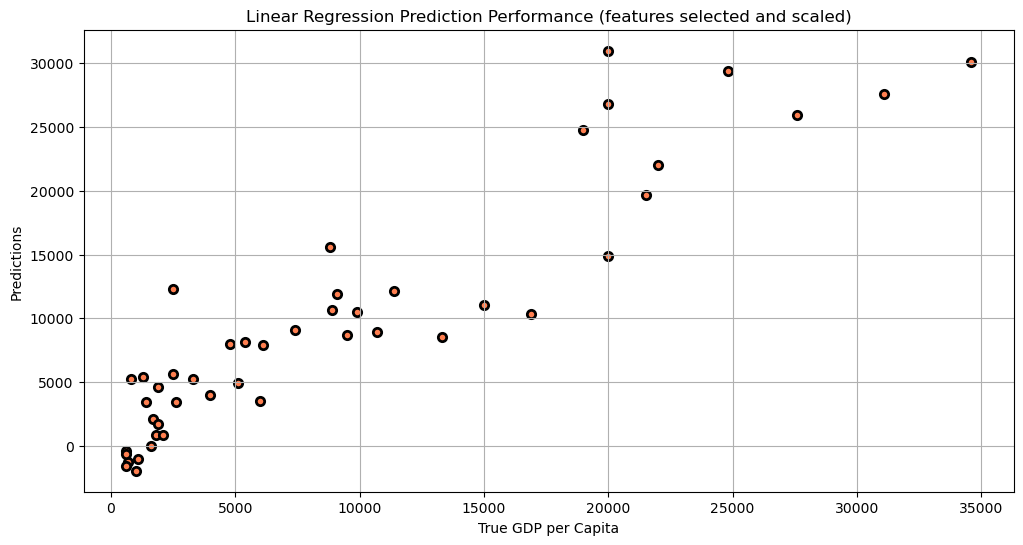

In [142]:
#Evaluation

print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

**SVM**

In [144]:
#Model Training

svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

SVR()

In [146]:
#Predictions

svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

SVM Performance:

all features, No scaling:
MAE: 7049.984895264721
RMSE: 9811.73631340298
R2_Score:  -0.16510345624387246

all features, with scaling:
MAE: 7042.737596769212
RMSE: 9800.406046613498
R2_Score:  -0.16241416444556656

selected features, No scaling:
MAE: 7047.711927073501
RMSE: 9807.997922107874
R2_Score:  -0.16421578810668724

selected features, with scaling:
MAE: 7040.043820847137
RMSE: 9794.58886537642
R2_Score:  -0.1610346364957338


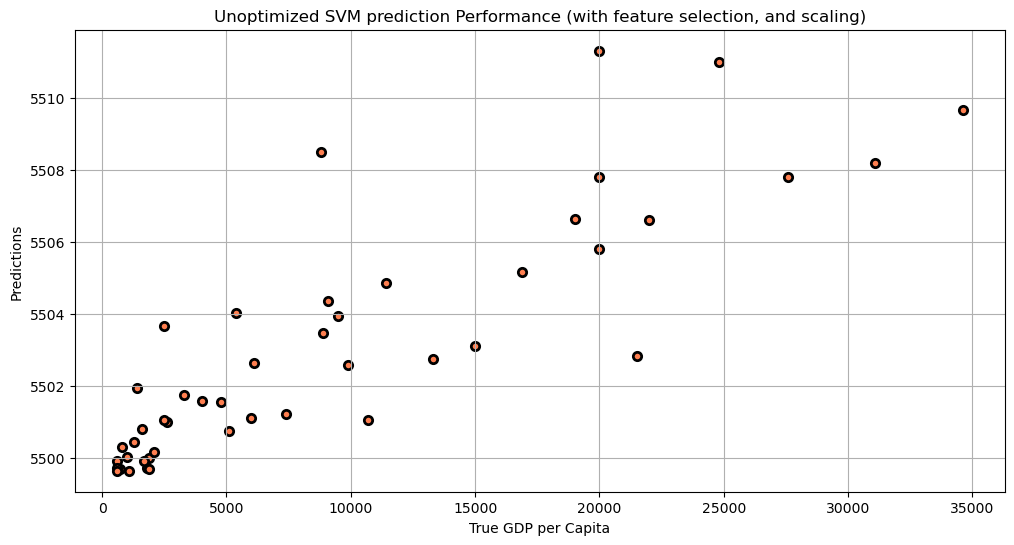

In [148]:
#Evaluation

print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

In [150]:
#Optimizing SVM

param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [152]:
grid.fit(X4_train,y4_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.324 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.115 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.372 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.158 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.117 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.373 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.325 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [154]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [156]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [158]:
grid_predictions = grid.predict(X4_test)

MAE: 6386.413128432553
RMSE: 9133.499345710767
R2_Score:  -0.009594923559210988


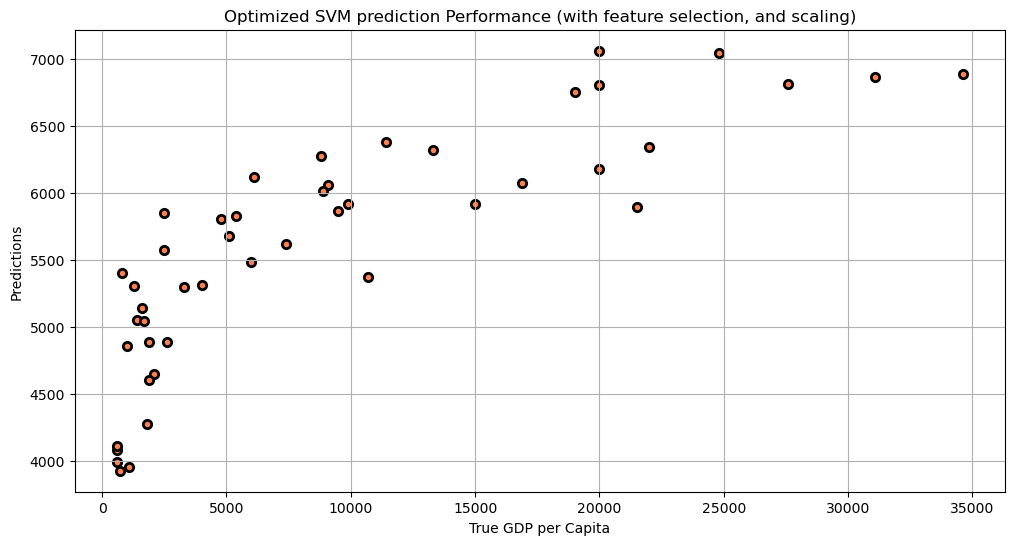

In [160]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

**RANDOM FOREST**

In [162]:
#Training

rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf3 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=200, random_state=101)

In [164]:
#Prediction

rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

Random Forest Performance:

all features, No scaling:
MAE: 2142.1304347826085
RMSE: 3097.1944738255706
R2_Score:  0.8839060185534444

selected features, No scaling:
MAE: 2416.0652173913045
RMSE: 3533.590316058036
R2_Score:  0.8488858452472634


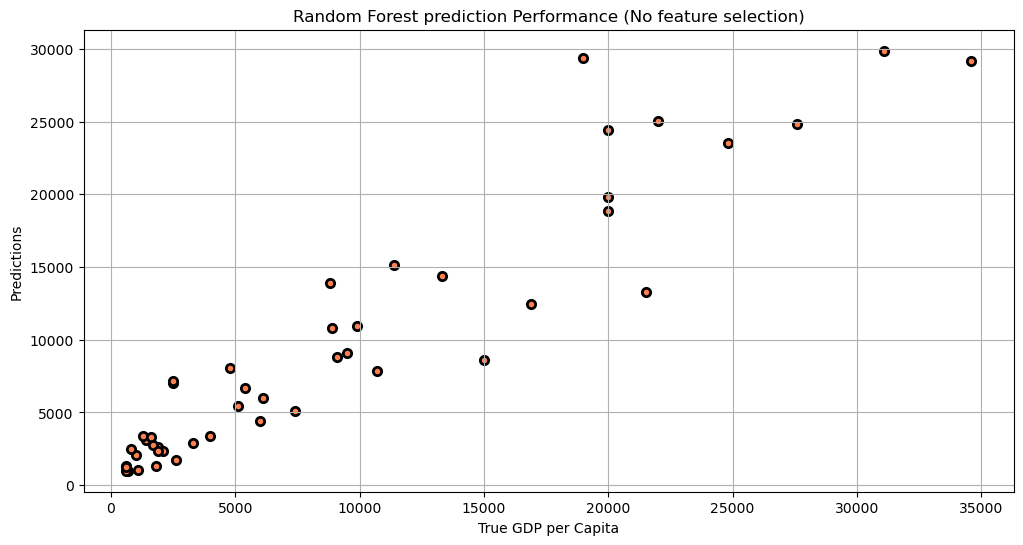

In [166]:
#Evaluation

print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

In [168]:
#Optimization

rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
             'bootstrap': [False, True]} 

In [170]:
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [172]:
rf_grid.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parame

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]})

In [174]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [176]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000)

In [178]:
rf_grid_predictions = rf_grid.predict(X_test)

MAE: 2297.1652173913044
RMSE: 3174.7924583314516
R2_Score:  0.878015841625341


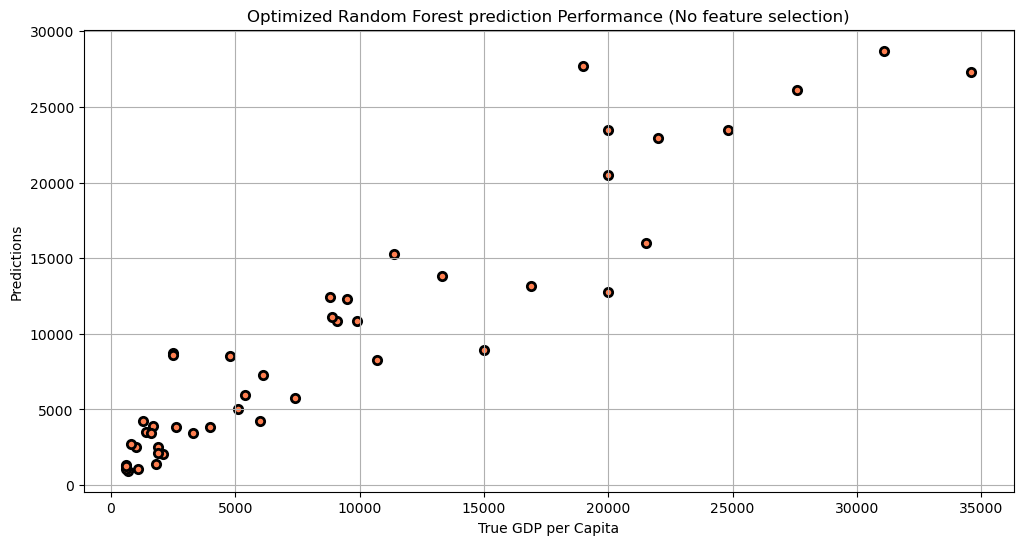

In [180]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

**GRADIENT BOOSTING**

In [182]:
#Training

gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=101)

In [184]:
#Prediction

gbm1_pred = gbm1.predict(X_test)
gbm3_pred = gbm3.predict(X3_test)

Gradiant Boosting Performance:

all features, No scaling:
MAE: 2280.4625959347395
RMSE: 3413.6352435789836
R2_Score:  0.8589714692004253

selected features, No scaling:
MAE: 2467.2081266874507
RMSE: 3789.2979753946875
R2_Score:  0.8262238105475073


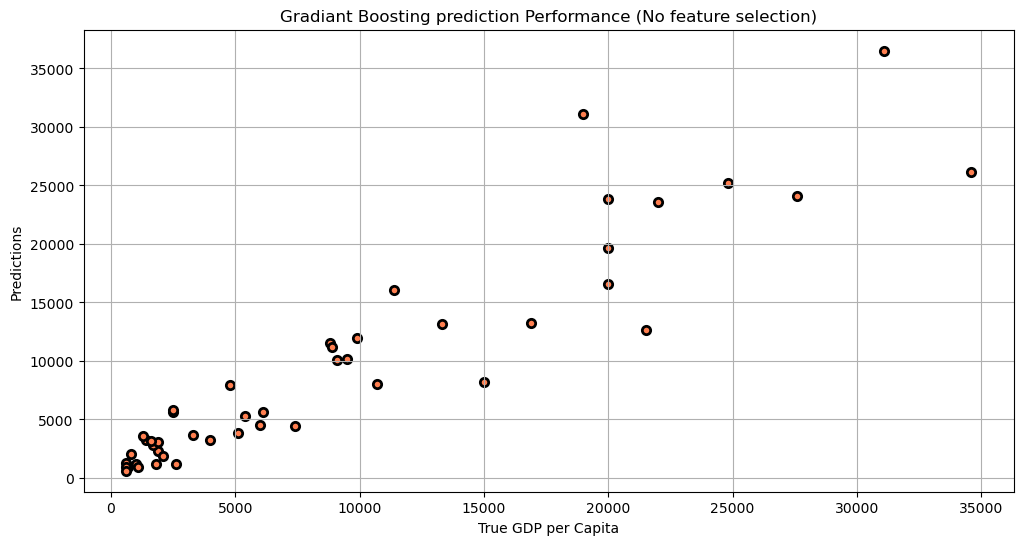

In [186]:
#Evaluation

print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gbm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gbm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gbm3_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (No feature selection)') 
plt.grid()
plt.show()

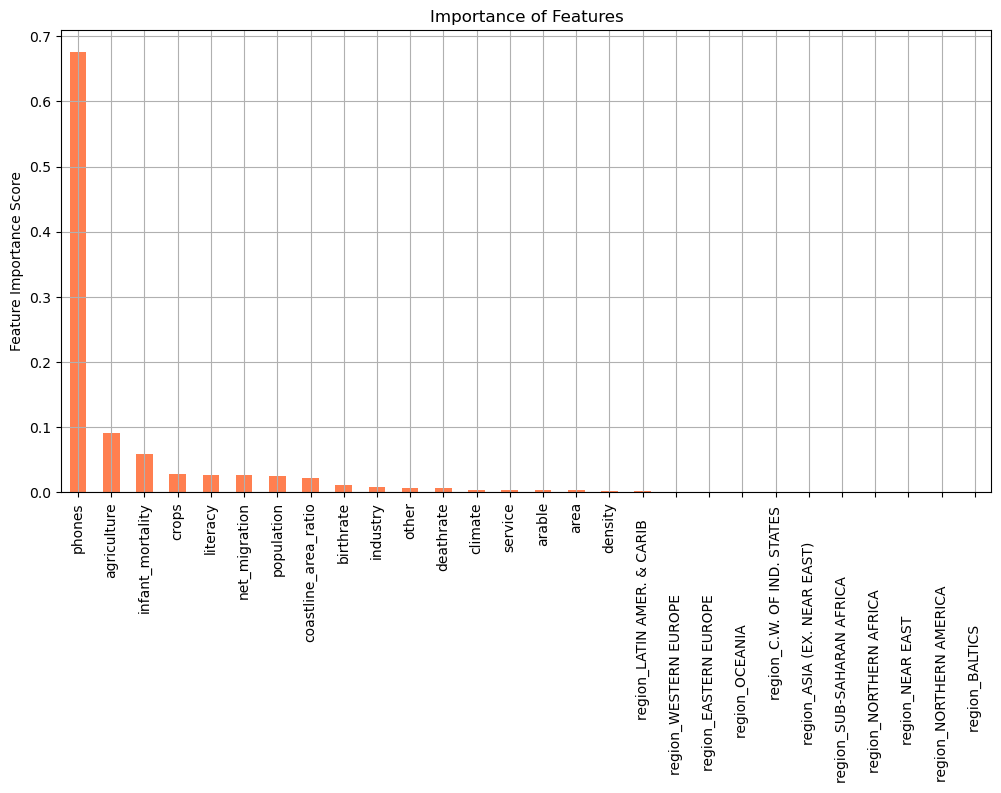

In [223]:
#Feature Importance

feat_imp = pd.Series(gbm1.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [197]:
#GBM Optimization

gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)

gbm_tuning.fit(X_train,y_train)
print(gbm_tuning.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.7}


In [198]:
gbm_grid_predictions = gbm_tuning.predict(X_test)

MAE: 2362.9354066125907
RMSE: 3469.360881371261
R2_Score:  0.8543294671599899


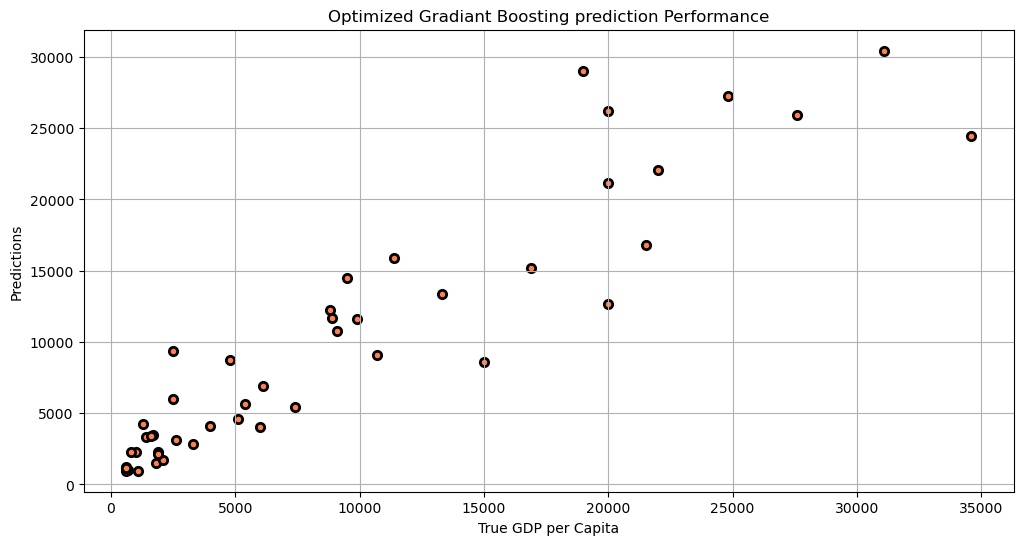

In [196]:
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Gradiant Boosting prediction Performance') 
plt.grid()
plt.show()

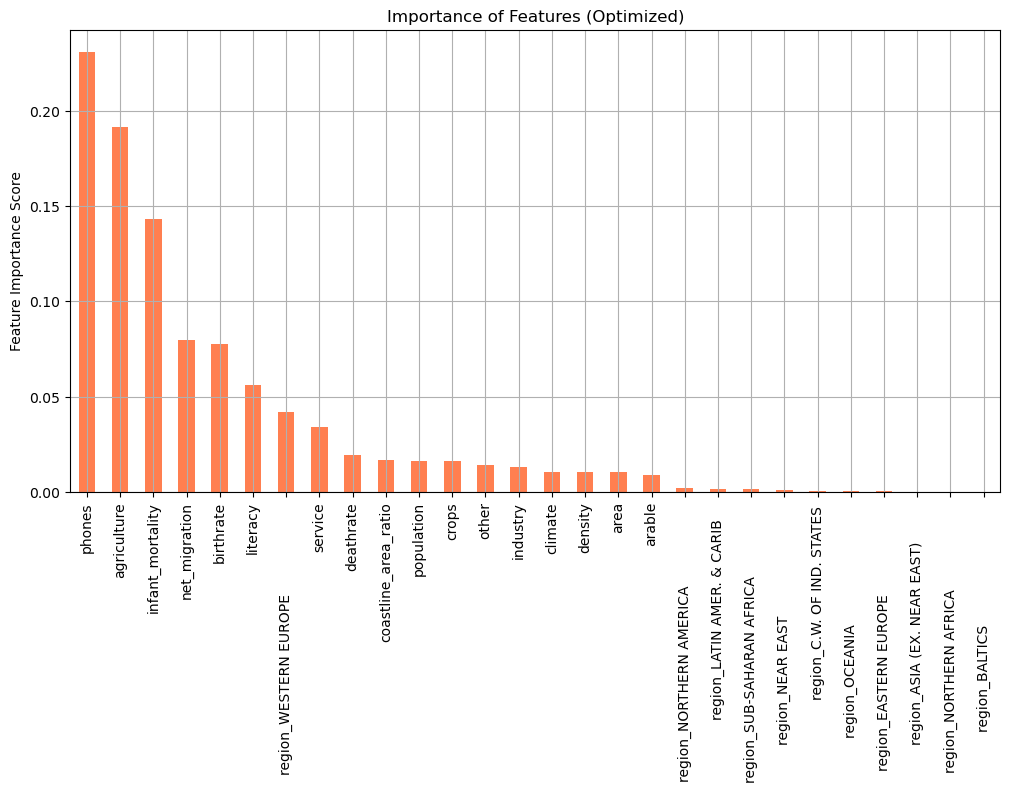

In [202]:
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=1, 
                                    subsample=0.7,max_features=7, random_state=101)
gbm_opt.fit(X_train,y_train)
feat_imp2 = pd.Series(gbm_opt.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp2.plot(kind='bar', title='Importance of Features (Optimized)', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [206]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [220]:
print("Model Performance Comparison:")
  
models = {
    'LinearRegression_all': LinearRegression().fit(X_train, y_train),
    'LinearRegression_selected': LinearRegression().fit(X3_train, y3_train),
    'SVR_all': SVR(kernel='rbf').fit(X_train, y_train),
    'SVR_selected': SVR(kernel='rbf').fit(X3_train, y3_train),
    'RandomForest_all': RandomForestRegressor(random_state=101, n_estimators=200).fit(X_train, y_train),
    'RandomForest_selected': RandomForestRegressor(random_state=101, n_estimators=200).fit(X3_train, y3_train),
    'GBM_all': GradientBoostingRegressor(random_state=101).fit(X_train, y_train),
    'GBM_selected': GradientBoostingRegressor(random_state=101).fit(X3_train, y3_train),
}

# Predictions
predictions = {
    'LinearRegression_all': models['LinearRegression_all'].predict(X_test),
    'LinearRegression_selected': models['LinearRegression_selected'].predict(X3_test),
    'SVR_all': models['SVR_all'].predict(X_test),
    'SVR_selected': models['SVR_selected'].predict(X3_test),
    'RandomForest_all': models['RandomForest_all'].predict(X_test),
    'RandomForest_selected': models['RandomForest_selected'].predict(X3_test),
    'GBM_all': models['GBM_all'].predict(X_test),
    'GBM_selected': models['GBM_selected'].predict(X3_test),
}

# Evaluation
results = {}
for name, preds in predictions.items():
    y_true = y_test if 'selected' not in name else y3_test
    results[name] = {
        'MAE': metrics.mean_absolute_error(y_true, preds),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_true, preds)),
        'R2': metrics.r2_score(y_true, preds)
    }

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
results_df

Model Performance Comparison:


,MAE,RMSE,R2
RandomForest_all,2142.130435,3.097194e+03,0.883906
GBM_all,2280.462596,3.413635e+03,0.858971
RandomForest_selected,2416.065217,3.533590e+03,0.848886
GBM_selected,2467.208127,3.789298e+03,0.826224
LinearRegression_selected,2965.935723,4.088795e+03,0.797669
SVR_selected,7047.711927,9.807998e+03,-0.164216
SVR_all,7049.984895,9.811736e+03,-0.165103
LinearRegression_all,330350.858660,1.570338e+06,-29843.120383


**CONCLUSION**

In this project, we used countries_of_the_world dataset to build a GDP predictor. 4 different learning regressors (Linear Regression, SVM, Random Forest, and Gradiant Boosting) were tested, and we have acheived the best prediction performance using Random Forest, followed by Gradiant Boosting, and then Linear Regression, while SVM acheived the worst performance of the 4.

The best prediction performance was acheived using Random Forest regressor, using all features in the dataset.
* Mean Absolute Error (MAE): 2142.13
* Root mean squared error (RMSE): 3097.19
* R-squared Score (R2_Score): 0.8839